<a href="https://colab.research.google.com/github/davidg335/Assignment-1-UCF-REU-Computer-Vision/blob/main/Assignment_1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import activations
from keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

from scipy import linalg

import json
#from google.colab import files



# Loading Data, Setup

In [29]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

In [30]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

In [31]:
#define the model parameters
batch_size= 64; #size of the subset of training data we choose for each training iteration
dim_rows=32;
dim_cols=32;
epochs = 1; # number of times we will train on the same training data
num_classes=100; # we want the output classes to match 0 through 9.
np.random.seed(34314);

In [32]:
#define the training and testing datasets
''' x is the input image on greyscale, 0-255
y is the correct 0-9 digit classification for each image of the same index
'''
print("Shape of x_train: ",x_train.shape);
print("Shape of y_train: ",y_train.shape);
print("Shape of x_test: ",x_test.shape);
print("Shape of y_test: ",y_test.shape);

Shape of x_train:  (50000, 32, 32, 3)
Shape of y_train:  (50000, 1)
Shape of x_test:  (10000, 32, 32, 3)
Shape of y_test:  (10000, 1)


In [33]:
#make sure that the input and output formatting is correct
x_train = x_train.reshape(x_train.shape[0], dim_rows, dim_cols, 3); #reshape as rows x cols x 1
x_test = x_test.reshape(x_test.shape[0], dim_rows, dim_cols, 3);


# the correct category labels are currently just in {0,1}. We want to have a one-hot encoding output to match the output of the neural network
y_train_hot = keras.utils.to_categorical(y_train, num_classes);
y_test_hot = keras.utils.to_categorical(y_test, num_classes);

# Playing Around

In [34]:

x={0:"gay", 2: "man",4982132: "bruh"}
#x=keras
with open("file_name.json","w") as urmom:
  json.dump(x,urmom)

with open("file_name.json","r") as urmom:
  history_data=json.load(urmom)
print(history_data)

{'0': 'gay', '2': 'man', '4982132': 'bruh'}


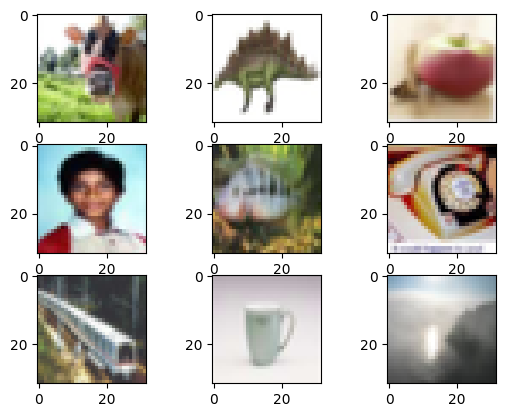

In [35]:

for i in range(0,9):
    plt.subplot(3,3,i+1);
    plt.imshow(x_train[i],interpolation="none")

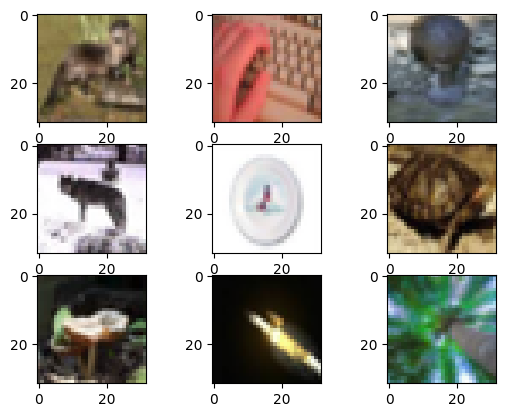

In [36]:

for i in range(100,109):
    plt.subplot(3,3,i-99);
    plt.imshow(x_train[i],interpolation="none")

In [37]:
y_train[100]

array([55])

Whitening algorithm attempt to implement

(9, 3072)


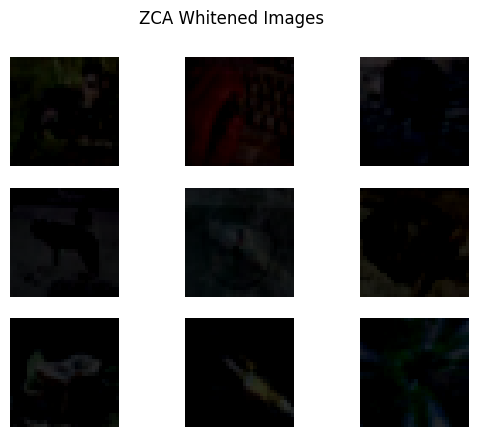

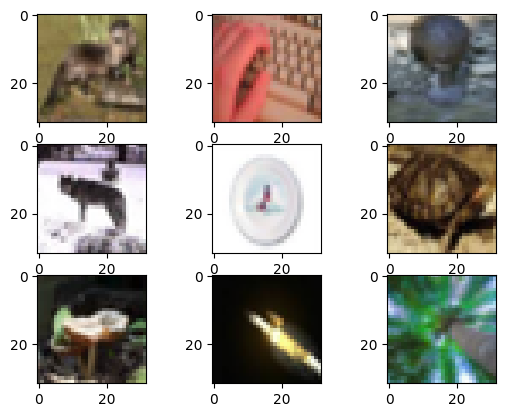

In [38]:

# Assume x_train is a NumPy array of shape (num_images, height, width)
# Example shape: (50000, 32, 32)
# Normalize and convert to float
x_subset = x_train[100:109].astype(np.float32) / 255.0 #why are we dividing by 255 here?

# Flatten each image to a vector
num_images = x_subset.shape[0]
flattened = x_subset.reshape(num_images, -1)  # Shape: (9, height*width)
flattened=flattened
# need to transpose the data here

# Center the data
mean = np.mean(flattened, axis=0)
centered = flattened - mean # centered variable is the matrix X in my notes

# Compute covariance matrix
cov = np.cov(centered, rowvar=False) #this is C in my notes)
cov_2=1/(num_images-1)*centered.T@centered # the operation that is occuring for cov


# Eigen-decomposition
eigvals, eigvecs = linalg.eigh(cov)

# Add small epsilon to prevent division by zero
epsilon = 1e-5
D_inv_sqrt = np.diag(1.0 / np.sqrt(eigvals + epsilon)) #this id D^(-1/2) in notes
# ZCA whitening matrix
ZCA_matrix = eigvecs @ D_inv_sqrt @ eigvecs.T # PD^(-1/2)P^T

# Apply ZCA whitening
zca_whitened = centered @ ZCA_matrix
print(zca_whitened.shape)

# Reshape and display whitened images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = zca_whitened[i].reshape(x_subset.shape[1:])  # (height, width)
    plt.imshow(image, interpolation='none')
    plt.axis('off')
plt.suptitle("ZCA Whitened Images")
plt.show()

for i in range(100,109):
    plt.subplot(3,3,i-99);
    plt.imshow(x_train[i],interpolation="none")
plt.show()





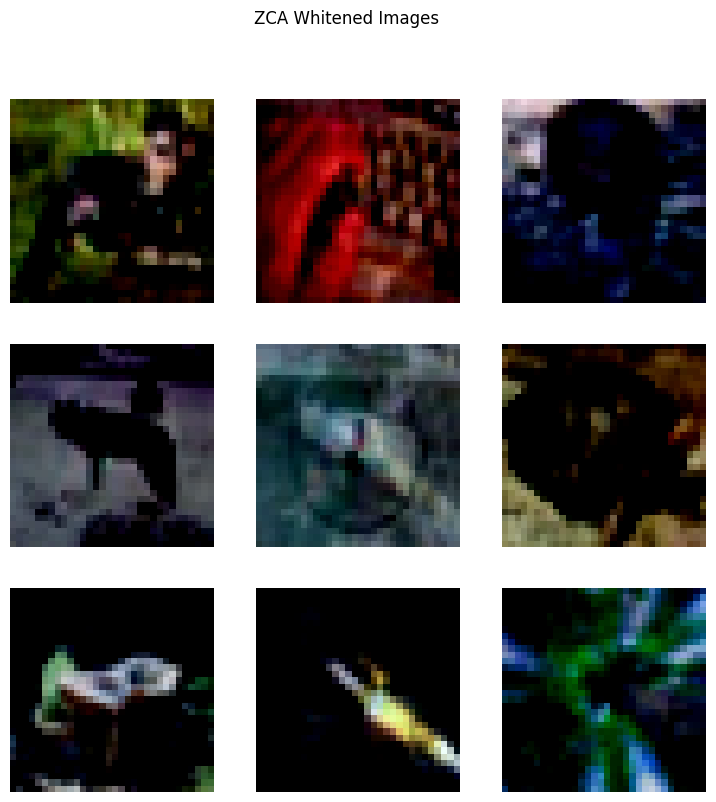

In [39]:
zca_scaled = zca_whitened / np.max(np.abs(zca_whitened))
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = zca_scaled[i].reshape(x_subset.shape[1:])  # (height, width)
    plt.imshow(image, interpolation='none')
    plt.axis('off')
plt.suptitle("ZCA Whitened Images")
plt.show()

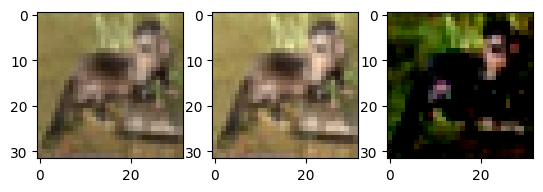

In [40]:
im_1_scaled = x_train[100] / np.max(np.abs(x_train[100]))
plt.subplot(1,3,1)
plt.imshow(x_train[100],interpolation="none")

plt.subplot(1,3,2)
plt.imshow(im_1_scaled,interpolation="none")


plt.subplot(1,3,3)

image = zca_scaled[0].reshape(x_subset.shape[1:])  # (height, width)
plt.imshow(image, interpolation='none')
plt.show()


In [41]:
'''indices_with_74 = [i for i, value in enumerate(y_test) if value == 46]



for a in range(0,500,49):
  for i in range(a,a+49):
      plt.subplot(7,7,i-a+1);
      plt.imshow(x_test[indices_with_74[i]],interpolation="none")
  print(a)
  plt.show()
  '''



'indices_with_74 = [i for i, value in enumerate(y_test) if value == 46]\n\n\n\nfor a in range(0,500,49):\n  for i in range(a,a+49):\n      plt.subplot(7,7,i-a+1);\n      plt.imshow(x_test[indices_with_74[i]],interpolation="none")\n  print(a)\n  plt.show()\n  '

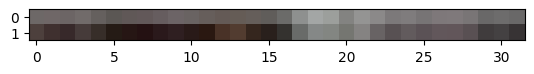

In [42]:
test =[[[109, 104, 103],
         [111, 103, 103],
         [108, 101, 101],
         [113, 107, 106],
         [101,  96,  94],
         [ 91,  87,  84],
         [ 96,  88,  87],
         [ 98,  88,  89],
         [102,  93,  95],
         [108, 100, 102],
         [105,  99,  98],
         [102,  94,  91],
         [100,  90,  86],
         [101,  92,  86],
         [101,  94,  90],
         [ 96,  93,  90],
         [107, 107, 105],
         [142, 144, 143],
         [163, 166, 165],
         [156, 159, 156],
         [131, 131, 129],
         [148, 148, 147],
         [139, 137, 137],
         [124, 121, 122],
         [127, 124, 125],
         [119, 116, 117],
         [126, 120, 122],
         [127, 121, 123],
         [121, 117, 118],
         [105, 104, 104],
         [109, 108, 108],
         [105, 104, 104]],

        [[ 77,  64,  61],
         [ 63,  48,  47],
         [ 55,  41,  42],
         [ 70,  59,  58],
         [ 55,  46,  41],
         [ 37,  27,  21],
         [ 38,  22,  20],
         [ 36,  17,  18],
         [ 42,  25,  27],
         [ 47,  31,  33],
         [ 41,  26,  24],
         [ 42,  24,  17],
         [ 73,  50,  39],
         [ 82,  60,  48],
         [ 53,  38,  30],
         [ 41,  32,  28],
         [ 52,  50,  47],
         [105, 107, 105],
         [133, 136, 135],
         [131, 134, 130],
         [117, 118, 113],
         [133, 131, 130],
         [104,  99, 100],
         [ 88,  81,  83],
         [ 98,  91,  93],
         [ 91,  82,  86],
         [ 98,  87,  91],
         [ 98,  86,  90],
         [ 89,  80,  83],
         [ 64,  60,  61],
         [ 68,  65,  66],
         [ 55,  51,  52]]]

plt.imshow(test,interpolation="none")

# The Model

## Useful resources:

The assignment slides for this

How to accessing the testing accuracy after each epoch: [Stack Overflow](https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy)



---



Do note that the history object that is created after fitting the model (running model.fit) has the following attributes:

(a) history.items() is of the form of a dictionary containing accuracy, loss, val_accuracy, and val_loss as keys. These value for these keys is a list that contains the corresponding value for the epoch corresponding to that index. The accuracy and the loss values are from the model state at the end of the epoch training stage, which will be different from the accuracy/loss values that the model may have had as it was training through the dataset.


### Define the Whitening Function

In [43]:
def zca_whiten_images(images, epsilon=1e-5, visualize=False):
    """
    Applies ZCA whitening to a batch of images.

    Parameters:
    - images: numpy array of shape (num_images, height, width)
      The input images, assumed to have pixel values in [0, 255].
    - epsilon: float
      Small constant to avoid division by zero in whitening.
    - visualize: bool
      If True, displays the first 9 whitened images.

    Returns:
    - zca_whitened_images: numpy array of shape (num_images, height, width)
      The ZCA whitened images.
    """

    # Normalize images to [0,1] range by dividing by 255.
    # This standardizes pixel values for numeric stability and consistent scale.
    images = images.astype(np.float32) / 255.0

    num_images = images.shape[0]
    height, width = images.shape[1], images.shape[2]

    # Flatten images to vectors of shape (num_images, height*width)
    flattened = images.reshape(num_images, -1)

    # Center the data by subtracting the mean image (mean vector)
    mean = np.mean(flattened, axis=0)
    centered = flattened - mean

    # Compute covariance matrix (shape: (features, features))
    cov = np.cov(centered, rowvar=False)

    # Eigen-decomposition of covariance matrix
    eigvals, eigvecs = linalg.eigh(cov)

    # Compute D^(-1/2)
    D_inv_sqrt = np.diag(1.0 / np.sqrt(eigvals + epsilon))

    # Compute ZCA whitening matrix
    ZCA_matrix = eigvecs @ D_inv_sqrt @ eigvecs.T

    # Apply whitening transform
    zca_whitened = centered @ ZCA_matrix

    # Reshape back to image shape
    zca_whitened_images = zca_whitened.reshape(num_images, height, width,3)

    if visualize:
        for i in range(min(9, num_images)):
            plt.subplot(3, 3, i + 1)
            plt.imshow(zca_whitened_images[i], cmap='gray', interpolation='none')
            plt.axis('off')
        plt.suptitle("ZCA Whitened Images")
        plt.show()

    return zca_whitened_images

In [44]:
# model A is the original model unchanged
def generate_model_A(batch_size, epochs):
  early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True);

  #define the sequential convolutional model

  model = Sequential();
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(dim_rows, dim_cols, 1)));
  model.add(Conv2D(64, (3,3), activation='relu'));
  model.add(MaxPooling2D(pool_size=(2,2)));
  model.add(Dropout(0.25));
  model.add(Flatten());
  model.add(Dense(128, activation='relu'));
  model.add(Dropout(0.5));
  model.add(Dense(num_classes, activation='softmax'));
  model.summary();
  # compile the model
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy']);
  print("model has compiled!")
  #run the model
  history=model.fit(x_train, y_train_hot,
            batch_size=batch_size,
            epochs=epochs, verbose=1,
            validation_data=(x_test, y_test_hot),
            callbacks=early_stopping);
  print("history output:", history );
  #evaluate performance

  score = model.evaluate(x_test, y_test_hot, verbose=0);

  print([(key, round(value[0], 4)) for key, value in history.history.items()])
  print("history data type:", type(history.history.items()))

  return history;

  '''
  print('Test loss:', score[0]);
  print('Test accuracy:', score[1]);
  '''


In [45]:
#model_B
#try to change activation to leaky relu
def generate_model_B(batch_size, epochs):
  epoch_accuracies=[];
  #define the sequential convolutional model

  model = Sequential();
  model.add(Conv2D(32, kernel_size=(3,3), input_shape=(dim_rows, dim_cols, 3))); #conv layer 1
  model.add(LeakyReLU(alpha=0.1))
#  model.add(MaxPooling2D(pool_size=(2,2))); # NEW pooling, pooling 0
  model.add(Conv2D(64, (5,5))); #conv layer 2
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size=(2,2))); #pooling 1
  model.add(Dropout(0.25)); #dropout 1
  model.add(Flatten());
  model.add(Dense(128)); #NN 1
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dropout(0.5)); #dropout 2
  model.add(Dense(num_classes, activation='softmax')); #NN 2
  model.summary();
  # compile the model
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy']);
  print("Model B has compiled!")
  #run the model
  history=model.fit(x_train, y_train_hot,
            batch_size=batch_size,
            epochs=epochs, verbose=1,
            validation_data=(x_test, y_test_hot));
  #evaluate performance

  #score = model.evaluate(x_test, y_test_hot, verbose=0);
  print("History.items contents: ", history.history.items())

  print([(key, round(value[-1], 4)) for key, value in history.history.items()])
  #print("history data type:", type(history.history.items()))

  return history;

  '''
  print('Test loss:', score[0]);
  print('Test accuracy:', score[1]);
  '''


In [46]:
# model C - from geeks4geeks
def generate_model_C(batch_size, epochs):
    from keras import layers
    model = Sequential([
        layers.Conv2D(16, (3, 3), activation='relu',
                      input_shape=(32, 32, 3), padding='same'),
        layers.Conv2D(32, (3, 3),
                      activation='relu',
                      padding='same'),
        layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same'),


        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(100, activation='softmax')
    ])
    model.summary();
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy']);
    '''
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        optimizer='adam',
        metrics= 'accuracy'
    )
    '''
    print("Model C has compiled!")
    #run the model
    history=model.fit(x_train, y_train_hot,
            batch_size=batch_size,
            epochs=epochs, verbose=1,
            validation_data=(x_test, y_test_hot));
    #evaluate performance

    #score = model.evaluate(x_test, y_test_hot, verbose=0);
    print("History.items contents: ", history.history.items())

    print([(key, round(value[-1], 4)) for key, value in history.history.items()])
    #print("history data type:", type(history.history.items()))

    return history;

In [47]:
# model D - from geeks4geeks with extra whitening step
def generate_model_D(batch_size, epochs):
    from keras import layers
    model = Sequential([
        layers.Conv2D(16, (3, 3), activation='relu',
                      input_shape=(32, 32, 3), padding='same'),
        layers.Conv2D(32, (3, 3),
                      activation='relu',
                      padding='same'),
        layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same'),


        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(100, activation='softmax')
    ])
    model.summary();
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy']);
    '''
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        optimizer='adam',
        metrics= 'accuracy'
    )
    '''
    print("Model D has compiled!")
    #run the model
    history=model.fit(x_train_whiten, y_train_hot,
            batch_size=batch_size,
            epochs=epochs, verbose=1,
            validation_data=(x_test_whiten, y_test_hot));
    #evaluate performance

    #score = model.evaluate(x_test, y_test_hot, verbose=0);
    print("History.items contents: ", history.history.items())

    print([(key, round(value[-1], 4)) for key, value in history.history.items()])
    #print("history data type:", type(history.history.items()))

    return history;

## Experiment


1.   Test dependence of epoch on accuracy
2.   Test dependence of batch size on accuracy
3.   Test dependence of loss functions on accuracy
4.   Try adding drop functions.
5.   Compare architectures with preexisting ones on Keras website.





In [ ]:
#Try changing the epochs
EPOCH_SIZE=200;
batch_size=32;
model_name="C"

x_train_whiten=zca_whiten_images(x_train);
x_test_whiten=zca_whiten_images(x_test);
if model_name=="A":
  history_accuracies = generate_model_A(batch_size, EPOCH_SIZE);#.34 accuracy with 2 epoch
  history_A=history_accuracies;
elif model_name=="B":
  history_accuracies = generate_model_B(batch_size, EPOCH_SIZE);
  history_B=history_accuracies
elif model_name=="C":
  history_accuracies = generate_model_C(batch_size, EPOCH_SIZE);
  history_C=history_accuracies
elif model_name=="D":
  history_accuracies = generate_model_D(batch_size, EPOCH_SIZE);
  history_C=history_accuracies


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,579,844 (32.73 MB)

 Trainable params: 8,578,820 (32.73 MB)

 Non-trainable params: 1,024 (4.00 KB)

Model C has compiled!
Epoch 1/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.0159 - loss: 5.1051 - val_accuracy: 0.0385 - val_loss: 4.7374
Epoch 2/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0323 - loss: 4.8184 - val_accuracy: 0.0582 - val_loss: 4.5851
Epoch 3/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0443 - loss: 4.6583 - val_accuracy: 0.0747 - val_loss: 4.4713
Epoch 4/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.0542 - loss: 4.5590 - val_accuracy: 0.0866 - val_loss: 4.4117
Epoch 5/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0638 - loss: 4.4481 - val_accuracy: 0.0999 - val_loss: 4.3492
Epoch 6/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.0735 - loss: 4.3844 - val_accuracy: 0.1041 - val_loss: 4.2853
Epoch 7/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.0775 - loss: 4.3318 - val_accuracy: 0.1132 - val_loss: 4.2073
Epoch 8/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/st

In [ ]:
x_test.shape

# Visualize

In [ ]:
plt.plot(history_accuracies.history['accuracy'])
plt.plot(history_accuracies.history['val_accuracy'])
plt.title('Model '+model_name+' Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
x_index = range(0, history_accuracies.params.get('epochs'),10) #sets the x axis indices to be integers in the range 0 to num_epochs-1
plt.xticks(x_index)
plt.yticks(np.arange(0,1.1,.1));
plt.savefig('model_'+model_name+".png")
plt.show()
#files.download('model_' + model_name + ".png")




print(f"Name:  {model_name}")
print(f"Number of epochs: {history_accuracies.params.get('epochs')}")
print(f"Batch size: {batch_size}")


#plt.plot(epoch[:,0], epoch[:,1],'rd') # 'r' is for red, 'o' is for circles

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix_for_classes(y_true, y_pred, class_indices, class_names=None):
    """
    Plots a confusion matrix for a subset of classes.

    Parameters:
    - y_true: array-like of shape (n_samples,), true class labels.
    - y_pred: array-like of shape (n_samples,), predicted class labels.
    - class_indices: list of 5 class indices to include in the confusion matrix.
    - class_names: list of strings, names for the selected classes (optional).
    """

    # Filter only the samples that belong to the selected classes
    mask = np.isin(y_true, class_indices)
    y_true_subset = y_true[mask]
    y_pred_subset = y_pred[mask]

    # Map the class indices to 0-4 range for display
    class_index_map = {original: new for new, original in enumerate(class_indices)}
    y_true_mapped = np.array([class_index_map[label] for label in y_true_subset])
    y_pred_mapped = np.array([class_index_map[label] for label in y_pred_subset if label in class_index_map])

    # Compute confusion matrix
    cm = confusion_matrix(y_true_mapped, y_pred_mapped, labels=range(len(class_indices)))

    # Define class labels for display
    display_labels = class_names if class_names else [f"Class {i}" for i in class_indices]

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title("Confusion Matrix (Subset of 5 Classes)")
    plt.show()


In [ ]:
# Example random data for illustration
np.random.seed(0)
y_true = np.random.randint(0, 100, size=1000)
y_pred = y_true.copy()
y_pred[np.random.choice(1000, 100, replace=False)] = np.random.randint(0, 100, size=100)

# Pick 5 random classes
selected_classes = [3, 15, 42, 67, 88]
class_names = ["Dog", "Plane", "Tree", "Car", "Chair"]

# Plot
plot_confusion_matrix_for_classes(y_true, y_pred, selected_classes, class_names)
